In [ ]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Reading data from the remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)


In [ ]:
# Preparing the data
X = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

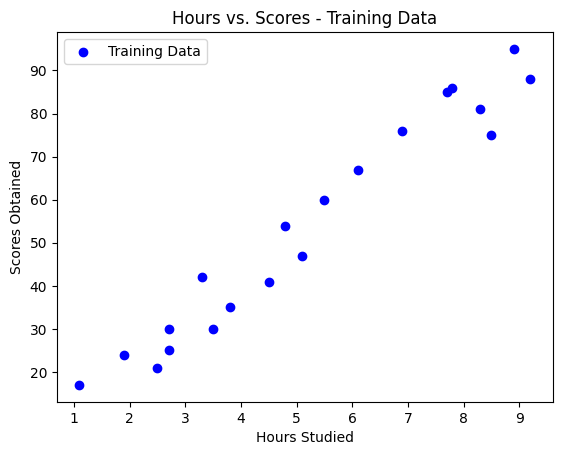

In [ ]:
# Visualizing the training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.title('Hours vs. Scores - Training Data')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.legend()
plt.show()

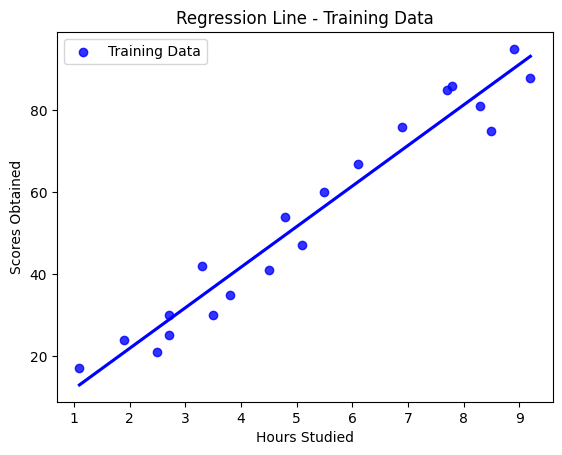

In [ ]:
# Visualizing the regression line
sns.regplot(x=X_train.flatten(), y=y_train, ci=None, color='blue', label='Training Data')
plt.title('Regression Line - Training Data')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.legend()
plt.show()

In [ ]:

# Creating and training the XGBoost regressor
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Making Predictions
hours = 9.25
hours_2d = [[hours]]
own_pred = regressor.predict(hours_2d)

In [ ]:
# Evaluating the model
y_pred = regressor.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)


In [ ]:
# Displaying results
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))
print('Mean Absolute Error:', mae)

No of Hours = 9.25
Predicted Score = 88.00031280517578
Mean Absolute Error: 4.299651336669922


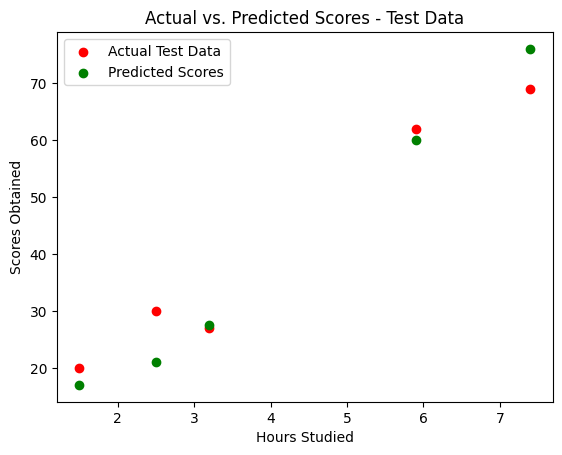

In [ ]:

# Visualizing the test data and model predictions
plt.scatter(X_test, y_test, color='red', label='Actual Test Data')
plt.scatter(X_test, y_pred, color='green', label='Predicted Scores')
plt.title('Actual vs. Predicted Scores - Test Data')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.legend()
plt.show()